In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
from simulator_wrapper import run_simulator_day

In [2]:
from reinforcement_learning.environment import Environment, dumb_policy
from reinforcement_learning.policy import DiscreteRandomPolicy, TransformDiscreteActions, \
    ContinuousRandomPolicy, TransformContinuousActions
from utils import extract_patient_meal_times, extract_patient_meal_carbs
NO_ACTION = np.zeros((2,3))
df = pd.read_csv('subject_profiles.csv')

def plot_simulator(day:int=0, BM=NO_ACTION):
    patient_data = df.iloc[day]
    meal_times = extract_patient_meal_times(patient_data)
    meal_carbs = extract_patient_meal_carbs(patient_data)
    assert len(meal_carbs) == len(meal_times), "Number of carb intakes and number of meals must be identical."
    time, glucose, score = run_simulator_day(day, BM)
    plt.plot(time, glucose, '--k')
    plt.vlines(meal_times, 0, 1000, 'r')
    plt.vlines(meal_times, 0, meal_carbs, 'k')
    plt.vlines(BM[0], 0, 1000, 'b')
    plt.hlines([70, 180], 0, 1440, 'g', alpha=0.5)
    plt.xlim(0, 1440)
    plt.ylim(0, 1000)
    print(r'With score: %f3'%(score))

## Horrible day

With score: 0.0000003


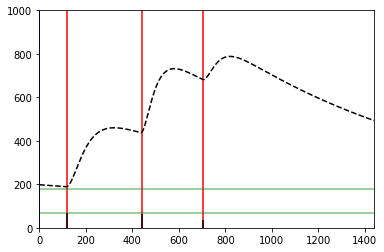

In [3]:
plot_simulator(day=0, BM=NO_ACTION)

In [4]:
num_meals_dict = defaultdict(list)
for day in range(40): 
    num_meals = len(extract_patient_meal_times(df.iloc[day]))
    num_meals_dict[str(num_meals)].append(day)
num_meals_dict

defaultdict(list,
            {'3': [0,
              1,
              2,
              3,
              4,
              5,
              7,
              8,
              10,
              11,
              13,
              14,
              16,
              19,
              20,
              21,
              23,
              24,
              25,
              26,
              27,
              28,
              29,
              30,
              31,
              32,
              33,
              34,
              35,
              37,
              38,
              39],
             '4': [6, 9, 12, 17, 18, 22, 36],
             '5': [15]})

## Example day

With score: 43.6111113


day_id                         1.00
start_sg                      78.00
daily_meal_count               3.00
daily_bolus_count_allowed      4.00
min_daily_bolus_allowed       13.04
max_daily_bolus_allowed       19.56
meal_1_time                  120.00
meal_1_carb                   44.00
meal_2_time                  480.00
meal_2_carb                   15.00
meal_3_time                  975.00
meal_3_carb                   58.00
meal_4_time                     NaN
meal_4_carb                     NaN
meal_5_time                     NaN
meal_5_carb                     NaN
Name: 1, dtype: float64

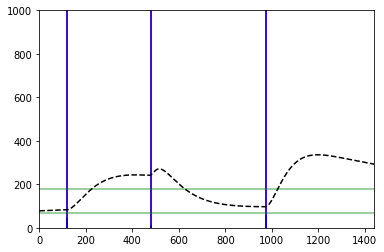

In [5]:
bm_example = np.array(
    [extract_patient_meal_times(df.iloc[1]), #time
    [ 12/3, 12/3, 12/3]]
) #bolus amount
plot_simulator(day = 1, BM=bm_example)
df.iloc[1]

## Example day with different dose

With score: 34.3750003


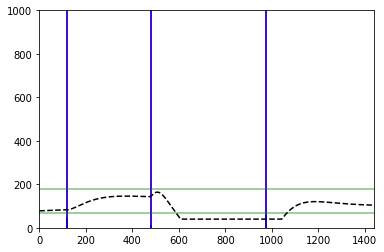

In [6]:
patient_data = df.iloc[1]
env = Environment(patient_data)
dumb_dosing_actions = dumb_policy(env)
dumb_BM = np.array([env.time_meals, dumb_dosing_actions])
plot_simulator(1, dumb_BM)

### Extract episode information with `get_trajectory`

In [7]:
states, next_states, state_extra, rewards, done, glucose, score = env.simulate_day(dumb_BM)
print(r"Glucose levels (states): {}".format(states))
print(r"Insulin dose (ay from action): {}".format(dumb_BM[1]))
print(r"Intermidiate rewards: {}".format(rewards))
print(r"Next Glucose levels (next states): {}".format(next_states))
print(r"Interval lengths (extra info): {}".format(state_extra['interval_size']))
print(r"Carb intakes (extra info): {}".format(state_extra['carbs']))
print(r"Simulator score for the episode: {}".format(score))

Glucose levels (states): [ 78.      106.36366 138.38786  40.     ]
Insulin dose (ay from action): [6.52 6.52 6.52]
Intermidiate rewards: [ 180.  360. -401.  344.]
Next Glucose levels (next states): [106.36366 138.38786  40.      104.27364]
Interval lengths (extra info): [120 360 495 464]
Carb intakes (extra info): [44. 15. 58.  0.]
Simulator score for the episode: 34.37500000000001


## How well does the dumb policy performe

In [8]:
for i in range(0, 40): 
    patient_data = df.iloc[i]
    env = Environment(patient_data)
    dumb_dosing_actions = dumb_policy(env)
    dumb_BM = np.array([env.time_meals, dumb_dosing_actions])
    _, _, _, _, _, glucose, score = env.simulate_day(dumb_BM)
    print(i, score)

0 -23.819444444444446
1 34.37500000000001
2 -28.402777777777782
3 -58.33333333333333
4 -70.20833333333333
5 -25.625
6 -97.08333333333333
7 81.80555555555556
8 42.56944444444444
9 -11.18055555555555
10 -3.125
11 10.763888888888886
12 86.18055555555556
13 41.111111111111114
14 -89.375
15 -28.68055555555555
16 -20.625
17 -75.06944444444446
18 54.93055555555556
19 47.43055555555556
20 62.43055555555556
21 -1.1805555555555571
22 -32.083333333333336
23 -11.527777777777771
24 -55.90277777777778
25 -11.666666666666671
26 -46.597222222222214
27 -39.513888888888886
28 -49.51388888888889
29 55.97222222222222
30 13.75
31 -58.888888888888886
32 -74.58333333333334
33 -71.31944444444444
34 58.263888888888886
35 63.333333333333336
36 -32.5
37 21.180555555555557
38 25.486111111111114
39 33.75


Best of all

With score: 86.1805563


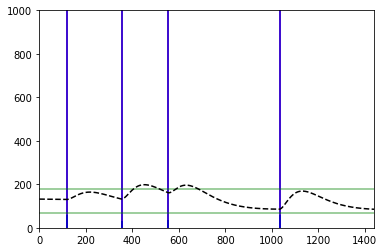

In [9]:
i = 12
patient_data = df.iloc[i]
env = Environment(patient_data)
dumb_dosing_actions = dumb_policy(env)
dumb_BM = np.array([env.time_meals, dumb_dosing_actions])
plot_simulator(day=i, BM=dumb_BM)

## Performance of a discrete random policy

With score: 13.8194443


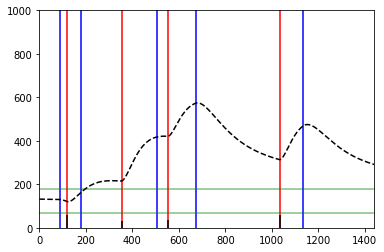

In [10]:
random_policy = DiscreteRandomPolicy()
i = 12
patient_data = df.iloc[i]
env = Environment(patient_data)
raw_actions = random_policy.act_episode(num_steps=env.num_meals + 1)
random_BM = TransformDiscreteActions().forward(raw_actions=raw_actions, 
                                               time_stamps=env.time_stamps, 
                                               dose_range=env.dose_range)
plot_simulator(day=i, BM=random_BM)

## Performance of a continuous random policy

With score: 30.7638893


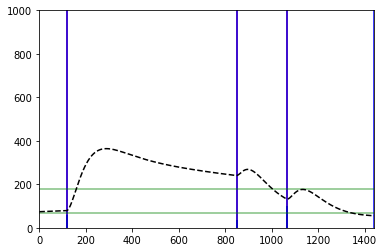

In [11]:
random_policy = ContinuousRandomPolicy()
i = 11
patient_data = df.iloc[i]
env = Environment(patient_data)
raw_actions = random_policy.act_episode(num_steps=env.num_meals + 1)
raw_actions[0, :] = np.ones_like(raw_actions[0, :])
random_BM = TransformContinuousActions().forward(raw_actions=raw_actions, 
                                               time_stamps=env.time_stamps, 
                                               dose_range=env.dose_range)
plot_simulator(day=i, BM=random_BM)

